Weather & patronage correlation and modeling

In [2]:
import pandas as pd  
import numpy as np  # For numerical operations
import scipy.stats  # For statistical functions, such as Pearson's correlation
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
weather = pd.read_csv('weather.csv')

In [4]:
display(weather.head())
weather.info()
weather.describe()
weather.isna().sum()
weather['Date'].value_counts()

Date  Minimum temperature (°C)  Maximum temperature (°C)  \
0  1/01/2023                      18.4                      35.9   
1  2/01/2023                      22.1                      32.0   
2  3/01/2023                      15.2                      21.1   
3  4/01/2023                      15.0                      18.7   
4  5/01/2023                      14.1                      21.6   

   Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
0            0.0               7.4              13.5   
1            6.4              13.4               9.3   
2            0.2               8.8               4.0   
3            0.0               6.0               0.0   
4            1.0               3.2               9.2   

   Speed of maximum wind gust (km/h) Time of maximum wind gust  \
0                                 31                     12:47   
1                                 52                      8:16   
2                                 37                     18:34   
3                                 52                     15:31   
4                                 39                     12:00   

   9am Temperature (°C)  9am relative humidity (%)  9am cloud amount (oktas)  \
0                  24.6                         65                       1.0   
1                  28.6                         47                       7.0   
2                  17.4                         68                       8.0   
3                  15.6                         62                       7.0   
4                  18.4                         66                       1.0   

   9am wind speed (km/h)  9am MSL pressure (hPa)  3pm Temperature (°C)  \
0                      7                  1010.8                  35.3   
1                     22                  1005.9                  21.1   
2                     11                  1010.2                  20.5   
3                     13                  1010.7                  16.0   
4                     13                  1014.9                  20.8   

   3pm relative humidity (%)  3pm cloud amount (oktas)  3pm wind speed (km/h)  \
0                         34                         7                     11   
1                         80                         6                     13   
2                         58                         7                     17   
3                         76                         7                     22   
4                         65                         5                     15   

   3pm MSL pressure (hPa)  
0                  1007.4  
1                  1006.6  
2                  1008.9  
3                  1011.2  
4                  1014.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               181 non-null    object 
 1   Minimum temperature (°C)           181 non-null    float64
 2   Maximum temperature (°C)           181 non-null    float64
 3   Rainfall (mm)                      181 non-null    float64
 4   Evaporation (mm)                   181 non-null    float64
 5   Sunshine (hours)                   181 non-null    float64
 6   Speed of maximum wind gust (km/h)  181 non-null    int64  
 7   Time of maximum wind gust          181 non-null    object 
 8   9am Temperature (°C)               181 non-null    float64
 9   9am relative humidity (%)          181 non-null    int64  
 10  9am cloud amount (oktas)           180 non-null    float64
 11  9am wind speed (km/h)              181 non-null    int64  

1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [5]:
patronage_daily = pd.read_csv('patronage_daily.csv')

In [6]:
display(patronage_daily.head(10))
patronage_daily.info()
patronage_daily.describe()
patronage_daily.isna().sum()
patronage_daily['Date'].value_counts()

Date  Daily_patronage 
0   1/01/2023            150137
1   2/01/2023            160550
2   3/01/2023            289413
3   4/01/2023            244355
4   5/01/2023            254273
5   6/01/2023            263023
6   7/01/2023            223893
7   8/01/2023            164386
8   9/01/2023            275255
9  10/01/2023            318470

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              181 non-null    object
 1   Daily_patronage   181 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [7]:
# Convert 'Date' to datetime format in both dataframes
patronage_daily['Date'] = pd.to_datetime(patronage_daily['Date'], dayfirst=True)
weather['Date'] = pd.to_datetime(weather['Date'], dayfirst=True)

# Merge patronge_daily and data_weather on 'Date'
merged_data_daily_weather = pd.merge(patronage_daily, weather, on='Date')
display(merged_data_daily_weather.head())


Date  Daily_patronage   Minimum temperature (°C)  \
0 2023-01-01            150137                      18.4   
1 2023-01-02            160550                      22.1   
2 2023-01-03            289413                      15.2   
3 2023-01-04            244355                      15.0   
4 2023-01-05            254273                      14.1   

   Maximum temperature (°C)  Rainfall (mm)  Evaporation (mm)  \
0                      35.9            0.0               7.4   
1                      32.0            6.4              13.4   
2                      21.1            0.2               8.8   
3                      18.7            0.0               6.0   
4                      21.6            1.0               3.2   

   Sunshine (hours)  Speed of maximum wind gust (km/h)  \
0              13.5                                 31   
1               9.3                                 52   
2               4.0                                 37   
3               0.0                                 52   
4               9.2                                 39   

  Time of maximum wind gust  9am Temperature (°C)  9am relative humidity (%)  \
0                     12:47                  24.6                         65   
1                      8:16                  28.6                         47   
2                     18:34                  17.4                         68   
3                     15:31                  15.6                         62   
4                     12:00                  18.4                         66   

   9am cloud amount (oktas)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
0                       1.0                      7                  1010.8   
1                       7.0                     22                  1005.9   
2                       8.0                     11                  1010.2   
3                       7.0                     13                  1010.7   
4                       1.0                     13                  1014.9   

   3pm Temperature (°C)  3pm relative humidity (%)  3pm cloud amount (oktas)  \
0                  35.3                         34                         7   
1                  21.1                         80                         6   
2                  20.5                         58                         7   
3                  16.0                         76                         7   
4                  20.8                         65                         5   

   3pm wind speed (km/h)  3pm MSL pressure (hPa)  
0                     11                  1007.4  
1                     13                  1006.6  
2                     17                  1008.9  
3                     22                  1011.2  
4                     15                  1014.3

In [8]:
# Identify the numeric columns in the merged_data_daily_weather dataframe
numeric_columns_daily_weather = merged_data_daily_weather.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix_daily_weather = merged_data_daily_weather[numeric_columns_daily_weather].corr()

# Calculate absolute values of correlations
correlations_abs = correlation_matrix_daily_weather.abs()

# Sort the correlations based on the 'Daily_patronage ' column
sorted_columns = correlations_abs['Daily_patronage '].sort_values(ascending=False).index

# Reorder the columns and the rows based on the sorted column names
sorted_correlation_matrix = correlations_abs[sorted_columns].reindex(sorted_columns)

In [9]:
# Set the size of the figure
plt.figure(figsize=(14, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(sorted_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Matrix: Total daily patronage & weather')

# Show the heatmap
plt.show()


Addtional
Test of correlation between 
different card group

In [10]:
#import patronage data
patronage = pd.read_csv('patronage.csv')
display(patronage.head(10))
patronage.info()
patronage.describe()
patronage.isna().sum()
patronage['Date'].value_counts()

Date  FULL FARE  OTHER  OTHER CONCESSION  SENIOR AGED  STUDENT  \
0   1/01/2023      95703   1013             18390        13344    18200   
1   2/01/2023     104797   1182             19792        11421    19422   
2   3/01/2023     191272   2400             32173        20938    36263   
3   4/01/2023     162980   1983             27249        18064    28497   
4   5/01/2023     168635   2067             28694        18881    30250   
5   6/01/2023     172005   2122             30062        19964    32767   
6   7/01/2023     140304   1537             26052        21467    29248   
7   8/01/2023     101770   1077             19632        16311    21603   
8   9/01/2023     191268   2540             28630        17814    28884   
9  10/01/2023     221487   2789             32414        21333    33336   

   TERTIARY  Total   
0      3487  150137  
1      3937  160550  
2      6369  289413  
3      5582  244355  
4      5747  254273  
5      6103  263023  
6      5284  223893  
7      3993  164386  
8      6121  275255  
9      7111  318470

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              181 non-null    object
 1   FULL FARE         181 non-null    int64 
 2   OTHER             181 non-null    int64 
 3   OTHER CONCESSION  181 non-null    int64 
 4   SENIOR AGED       181 non-null    int64 
 5   STUDENT           181 non-null    int64 
 6   TERTIARY          181 non-null    int64 
 7   Total             181 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 11.4+ KB


1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [11]:
patronage['Date'] = pd.to_datetime(patronage['Date'],dayfirst=True)

# Merge data_performance and data_weather on 'Date'
merged_data_patronage_weather = pd.merge(patronage, weather, on='Date')

# Identify the numeric columns in the merged_data_safety_weather dataframe
numeric_columns_patronage_weather = merged_data_patronage_weather.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix_patronage_weather = merged_data_patronage_weather[numeric_columns_patronage_weather].corr()
#print(correlation_matrix_patronage_weather)



/tmp/ipykernel_619/3321070755.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(patronage.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)


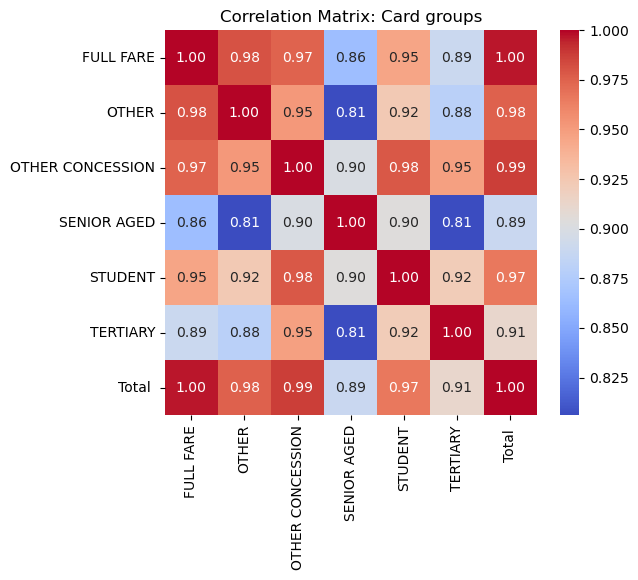

In [12]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(patronage.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Card groups')
plt.show()
